<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Linear_regression/Lab_Boston_Housing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importar Librerías</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a> 
4. <a href="#item33">Preparación de datos</a> 
5. <a href="#item33">Construir un modelo de regresión lineal</a>  
6. <a href="#item34">Entrenar y Testear el modelo</a>  

</font>
</div>

## Descargar y limpiar Dataset


Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib tenga una configuración adecuada para el tamaño de nuestros gráficos. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto), así como Scikit-Learn ≥0.20.

In [1]:
# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---

<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)</strong>


## 1. Leyendo y Explorando data

In [2]:
#cargamos la data

pddf = pd.read_csv('HousingData 2.csv')

In [3]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
pddf.shape

(506, 14)

In [5]:
# Vamos a describir la información
pddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


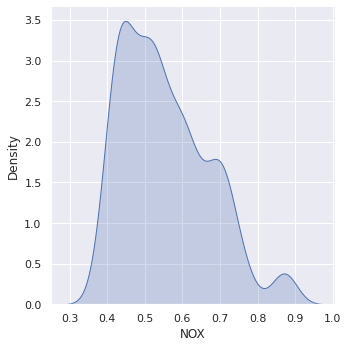

In [6]:
# Gráfico de distribución 
import seaborn as sns
sns.displot(pddf.NOX, kind="kde", fill=True)

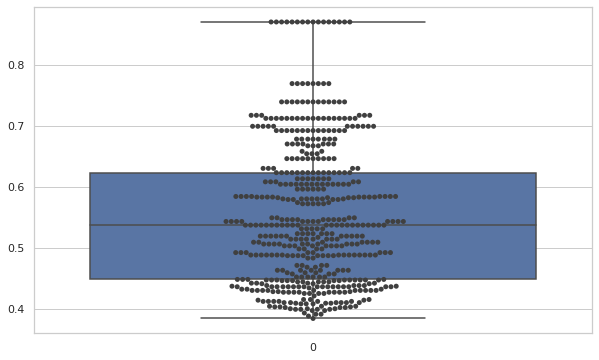

In [7]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.NOX, orient="v")
ax = sns.swarmplot(data=pddf.NOX, color=".25")


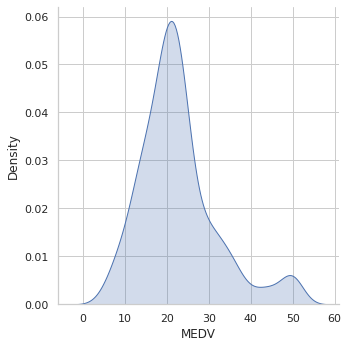

In [8]:
sns.displot(pddf.MEDV, kind="kde", fill=True)

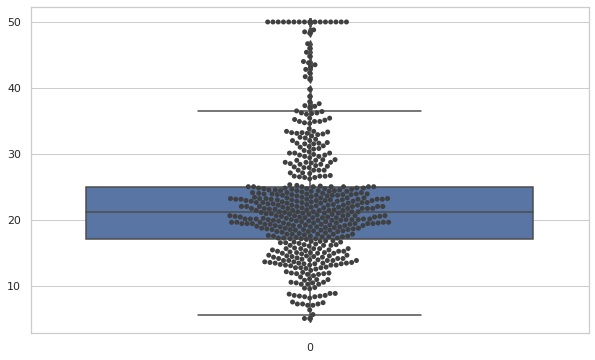

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.MEDV, orient="v")
ax = sns.swarmplot(data=pddf.MEDV, color=".25")

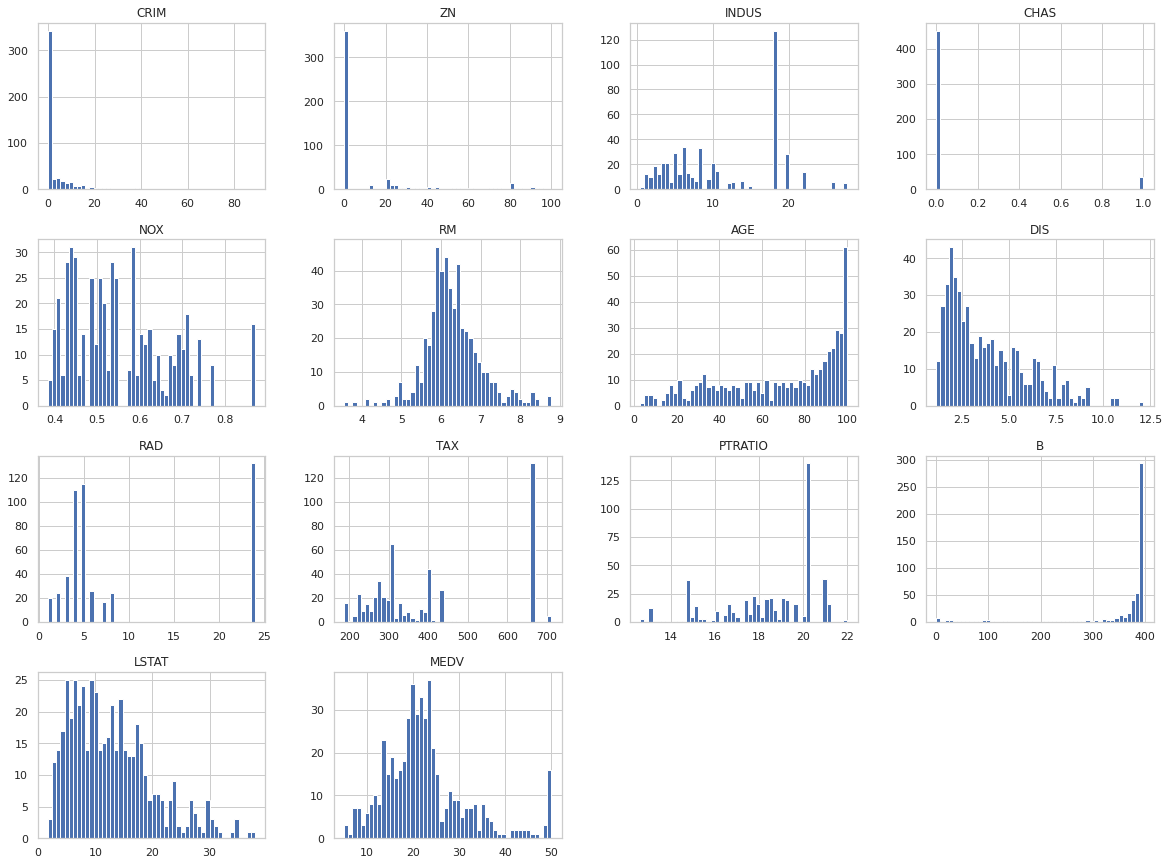

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Selección de muestras

In [11]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [12]:
# Shuffle the data
from sklearn.utils import shuffle
pddf = shuffle(pddf, random_state = 123)


In [13]:
# Elección de variables
features = list(set(pddf.columns.tolist()) - set(['MEDV']))
features


['TAX',
 'CRIM',
 'B',
 'CHAS',
 'DIS',
 'RAD',
 'LSTAT',
 'NOX',
 'AGE',
 'PTRATIO',
 'ZN',
 'RM',
 'INDUS']

In [14]:
# Definiendo data
X = pddf[features]
y = pddf.MEDV


In [15]:
# Muestreo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7, 
                                                    random_state = 123)


In [16]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(506, 13)
(354, 13)
(152, 13)


Text(0, 0.5, '$y$')

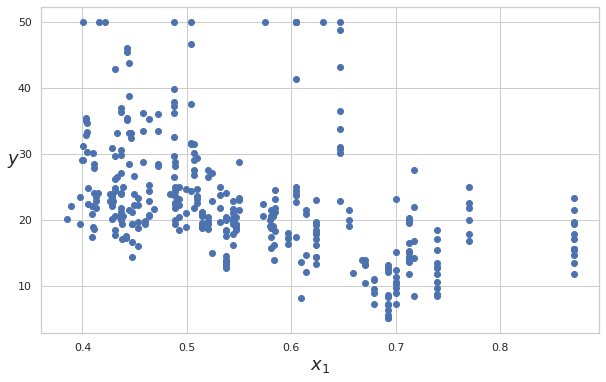

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(X_train.NOX, y_train)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

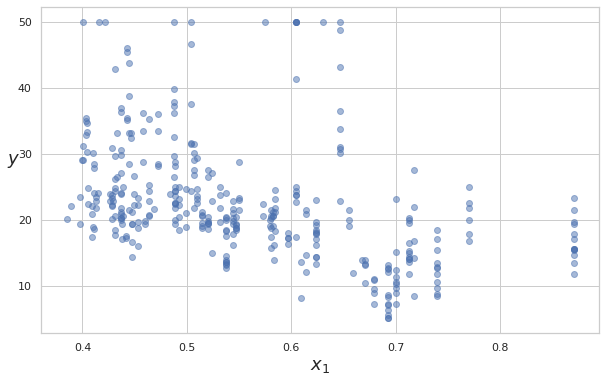

In [18]:
plt.scatter(X_train.NOX, y_train, alpha = 0.5)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a605ef10>,
      dtype=object)

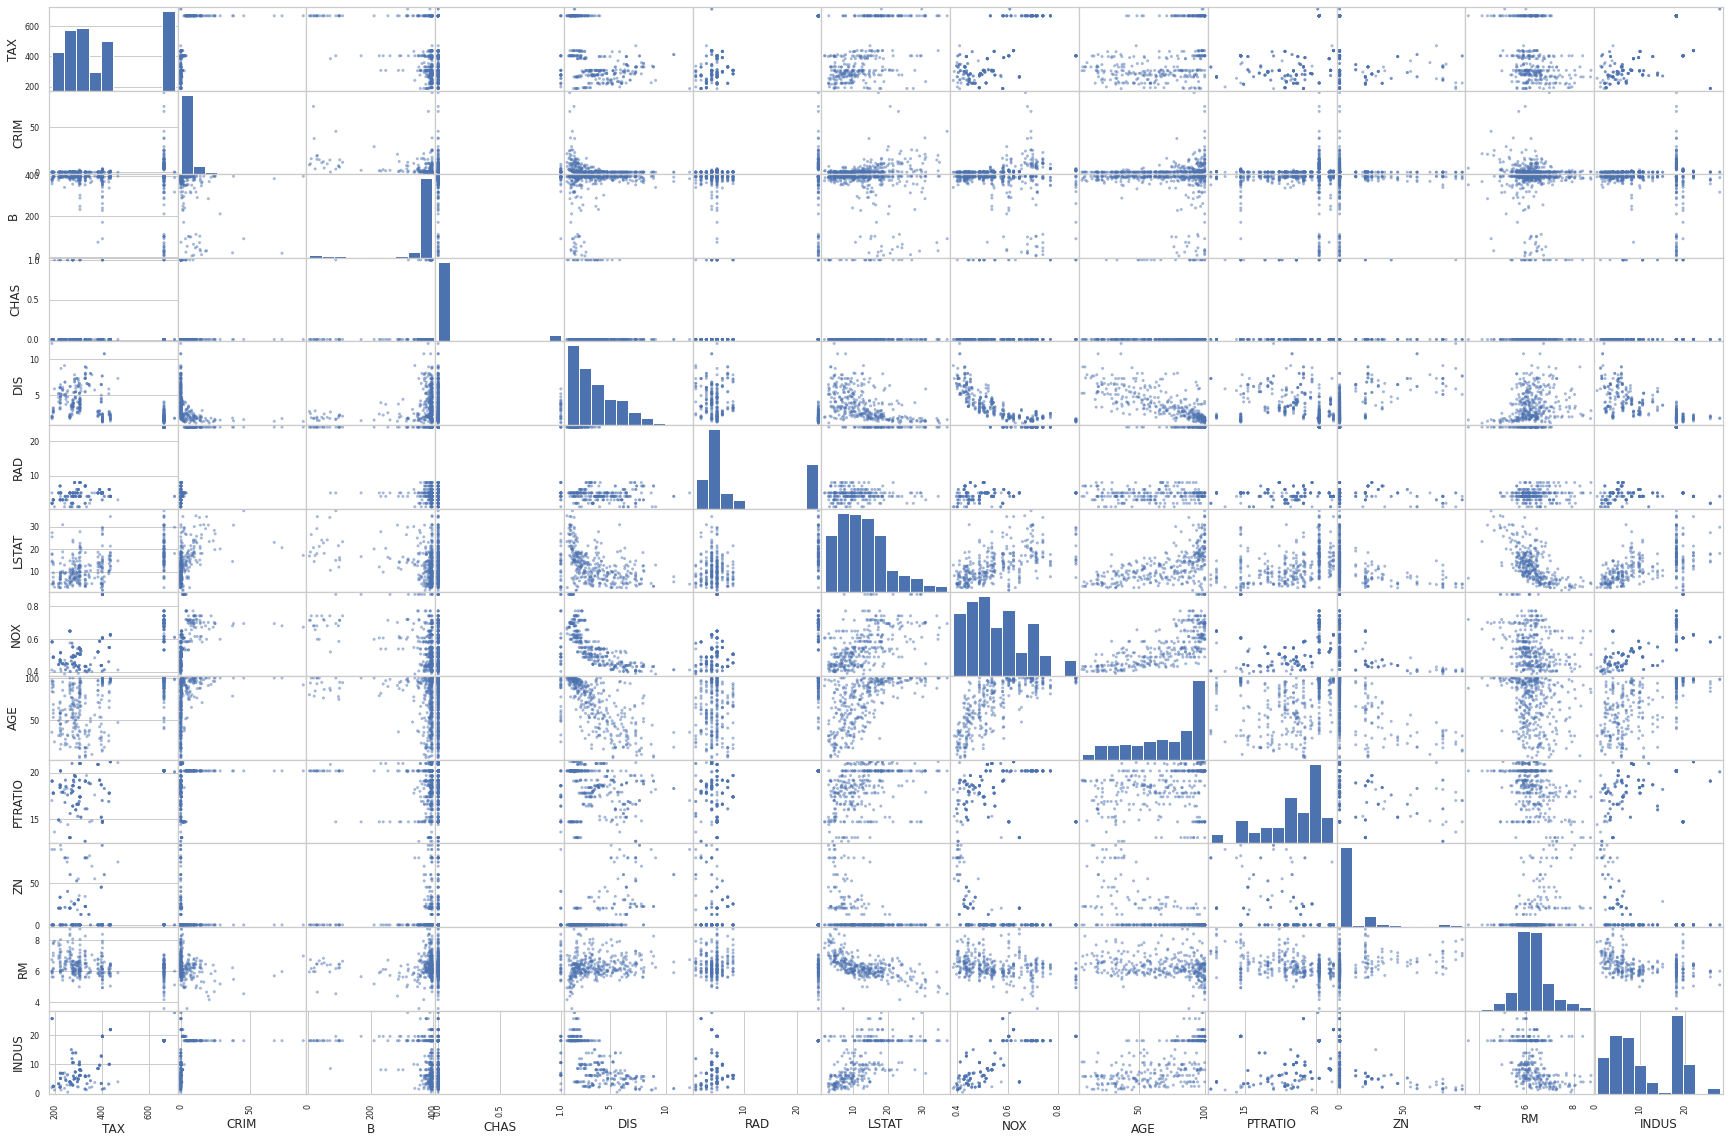

In [19]:
# Matriz de scatterplots
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(30, 20))


## 3. Pre-selección de variables

In [20]:
# Dando formato a nuestra tabla resumen

pdResume = X_train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)


In [21]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/X_train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [22]:
# Calculando las correlaciones de todas las variables con el target

temp = X_train.copy()
temp['target'] = y_train

correlations = []
for col in features:
  correlations.append(temp[[col, 'target']].corr().iloc[0][1])


In [23]:
# Cruzando correlaciones con la tabla de resumen original

pdres_cor = pd.DataFrame({'feature' : features, 'corr_MEDV' : correlations})
pdResume2 = pd.merge(pdResume, pdres_cor, on = 'feature')


In [24]:
pdResume2['abs_corr_MEDV'] = pdResume2.corr_MEDV.apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr_MEDV', ascending = False, inplace=True)

pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV
12,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.763989,0.763989
1,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.751647,0.751647
11,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561413,0.561413
6,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.523892,0.523892
0,INDUS,338.0,11.082751,6.868390,0.460,5.13000,9.690,18.10000,27.740,0.045198,-0.512475,0.512475


In [25]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)

## 4. Preparación de datos

<h3>Tratamiento de outliers</h3> 

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

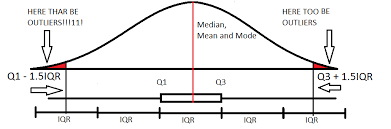 

In [26]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head() 

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV
0,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.763989,0.763989
1,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.751647,0.751647
2,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561413,0.561413
3,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.523892,0.523892
4,INDUS,338.0,11.082751,6.868390,0.460,5.13000,9.690,18.10000,27.740,0.045198,-0.512475,0.512475


In [27]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head() 

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV,ric,min_ric,max_ric
0,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.763989,0.763989,0.7235,4.7930,7.6870
1,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.751647,0.751647,9.6650,-7.0625,31.5975
2,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561413,0.561413,3.2000,12.2000,25.0000
3,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.523892,0.523892,389.0000,-306.5000,1249.5000
4,INDUS,338.0,11.082751,6.868390,0.460,5.13000,9.690,18.10000,27.740,0.045198,-0.512475,0.512475,12.9700,-14.3250,37.5550


In [28]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

,TAX,CRIM,B,CHAS,DIS,RAD,LSTAT,NOX,AGE,PTRATIO,...,TAX_tric,INDUS_tric,RAD_tric,NOX_tric,CRIM_tric,AGE_tric,ZN_tric,B_tric,DIS_tric,CHAS_tric
385,666,16.81180,396.90,0.0,1.4261,24,30.81,0.700,98.1,20.2,...,666,18.10,24,0.700,8.580061,98.1,0.000,396.90,1.4261,0.0
13,307,0.62976,396.90,0.0,4.7075,4,8.26,0.538,61.8,21.0,...,307,8.14,4,0.538,0.629760,61.8,0.000,396.90,4.7075,0.0
221,307,0.40771,395.24,1.0,3.0480,8,21.46,0.507,91.3,17.4,...,307,6.20,8,0.507,0.407710,91.3,0.000,395.24,3.0480,0.0
290,245,0.03502,396.90,0.0,5.1167,4,3.33,0.411,27.9,19.2,...,245,4.95,4,0.411,0.035020,27.9,15.625,396.90,5.1167,0.0
193,265,0.02187,393.37,0.0,6.2196,1,5.03,0.401,NaN,15.6,...,265,2.93,1,0.401,0.021870,NaN,15.625,393.37,6.2196,0.0


Revisemos los resultados

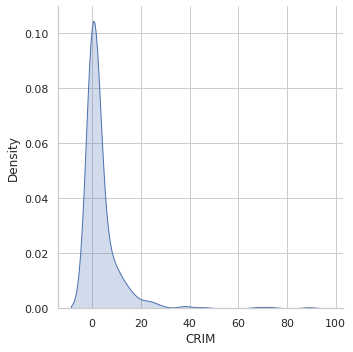

In [29]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

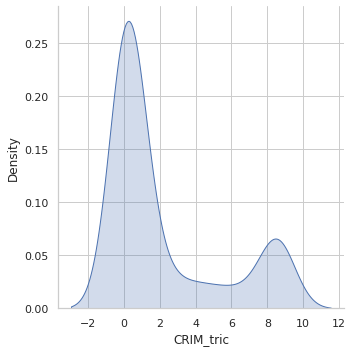

In [30]:
sns.displot(X_train, x = "CRIM_tric", kind="kde", fill=True)

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500" 
     height="300" > 

In [31]:
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV,ric,min_ric,max_ric
0,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.763989,0.763989,0.7235,4.7930,7.6870
1,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.751647,0.751647,9.6650,-7.0625,31.5975
2,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561413,0.561413,3.2000,12.2000,25.0000
3,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.523892,0.523892,389.0000,-306.5000,1249.5000
4,INDUS,338.0,11.082751,6.868390,0.460,5.13000,9.690,18.10000,27.740,0.045198,-0.512475,0.512475,12.9700,-14.3250,37.5550


In [32]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head() 

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV,ric,min_ric,max_ric,min_zscore,max_zscore
0,RM,354.0,6.276766,0.705929,3.561,5.87825,6.185,6.60175,8.725,0.000000,0.763989,0.763989,0.7235,4.7930,7.6870,4.158979,8.394552
1,LSTAT,339.0,12.945015,7.195009,1.730,7.43500,11.740,17.10000,36.980,0.042373,-0.751647,0.751647,9.6650,-7.0625,31.5975,-8.640012,34.530042
2,PTRATIO,354.0,18.375706,2.194308,12.600,17.00000,18.800,20.20000,21.200,0.000000,-0.561413,0.561413,3.2000,12.2000,25.0000,11.792781,24.958631
3,TAX,354.0,402.813559,167.121147,187.000,277.00000,330.000,666.00000,711.000,0.000000,-0.523892,0.523892,389.0000,-306.5000,1249.5000,-98.549883,904.177001
4,INDUS,338.0,11.082751,6.868390,0.460,5.13000,9.690,18.10000,27.740,0.045198,-0.512475,0.512475,12.9700,-14.3250,37.5550,-9.522419,31.687922


In [33]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

,TAX,CRIM,B,CHAS,DIS,RAD,LSTAT,NOX,AGE,PTRATIO,...,TAX_tzscore,INDUS_tzscore,RAD_tzscore,NOX_tzscore,CRIM_tzscore,AGE_tzscore,ZN_tzscore,B_tzscore,DIS_tzscore,CHAS_tzscore
385,666,16.81180,396.90,0.0,1.4261,24,30.81,0.700,98.1,20.2,...,666,18.10,24,0.700,16.81180,98.1,0.000000,396.90,1.4261,0.000000
13,307,0.62976,396.90,0.0,4.7075,4,8.26,0.538,61.8,21.0,...,307,8.14,4,0.538,0.62976,61.8,0.000000,396.90,4.7075,0.000000
221,307,0.40771,395.24,1.0,3.0480,8,21.46,0.507,91.3,17.4,...,307,6.20,8,0.507,0.40771,91.3,0.000000,395.24,3.0480,0.891748
290,245,0.03502,396.90,0.0,5.1167,4,3.33,0.411,27.9,19.2,...,245,4.95,4,0.411,0.03502,27.9,75.914296,396.90,5.1167,0.000000
193,265,0.02187,393.37,0.0,6.2196,1,5.03,0.401,NaN,15.6,...,265,2.93,1,0.401,0.02187,NaN,60.000000,393.37,6.2196,0.000000


Revisemos los resultados

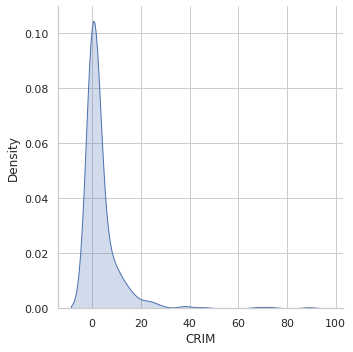

In [34]:
sns.displot(X_train, x = "CRIM", kind="kde", fill=True)

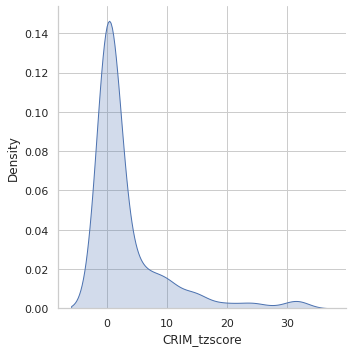

In [35]:
sns.displot(X_train, x = "CRIM_tzscore", kind="kde", fill=True)

In [37]:
univariate_II.to_csv('univariate_assesment.csv', index = 0)

### Tratamiento de Missings

In [38]:
all_features = X_train.columns.tolist()

In [39]:
# Trataiento de missings

X_train[[x + '_imp' for x in all_features]] = X_train[all_features].fillna(X_train[all_features].median())


In [40]:
X_train[[x + '_imp' for x in all_features]].head(30)

,TAX_imp,CRIM_imp,B_imp,CHAS_imp,DIS_imp,RAD_imp,LSTAT_imp,NOX_imp,AGE_imp,PTRATIO_imp,...,TAX_tzscore_imp,INDUS_tzscore_imp,RAD_tzscore_imp,NOX_tzscore_imp,CRIM_tzscore_imp,AGE_tzscore_imp,ZN_tzscore_imp,B_tzscore_imp,DIS_tzscore_imp,CHAS_tzscore_imp
385,666,16.81180,396.90,0.0,1.4261,24,30.81,0.700,98.1,20.2,...,666,18.10,24,0.700,16.81180,98.1,0.000000,396.90,1.426100,0.000000
13,307,0.62976,396.90,0.0,4.7075,4,8.26,0.538,61.8,21.0,...,307,8.14,4,0.538,0.62976,61.8,0.000000,396.90,4.707500,0.000000
221,307,0.40771,395.24,1.0,3.0480,8,21.46,0.507,91.3,17.4,...,307,6.20,8,0.507,0.40771,91.3,0.000000,395.24,3.048000,0.891748
290,245,0.03502,396.90,0.0,5.1167,4,3.33,0.411,27.9,19.2,...,245,4.95,4,0.411,0.03502,27.9,75.914296,396.90,5.116700,0.000000
193,265,0.02187,393.37,0.0,6.2196,1,5.03,0.401,78.1,15.6,...,265,2.93,1,0.401,0.02187,78.1,60.000000,393.37,6.219600,0.000000
435,666,11.16040,109.85,0.0,2.1247,24,23.27,0.740,94.6,20.2,...,666,18.10,24,0.740,11.16040,94.6,0.000000,109.85,2.124700,0.000000
339,224,0.05497,396.90,0.0,4.8122,5,9.74,0.515,45.4,20.2,...,224,5.19,5,0.515,0.05497,45.4,0.000000,396.90,4.812200,0.000000
172,296,0.13914,396.90,0.0,2.5961,5,14.69,0.510,88.5,16.6,...,296,4.05,5,0.510,0.13914,88.5,0.000000,396.90,2.596100,0.000000
230,307,0.53700,378.35,0.0,3.6715,8,11.65,0.504,68.1,17.4,...,307,6.20,8,0.504,0.53700,68.1,0.000000,378.35,3.671500,0.000000
334,224,0.03738,389.40,0.0,6.4584,5,6.75,0.515,38.5,20.2,...,224,5.19,5,0.515,0.03738,38.5,0.000000,389.40,6.458400,0.000000


## 5. Modelo de regresión Lineal

### Rregresión lineal por máxima verosimilitud

In [41]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train[[x + '_imp' for x in all_features if '_tric' in x]])
res = mod.fit()


In [42]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              857.3
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                   6.88e-247
Time:                        00:46:58   Log-Likelihood:                         -1022.9
No. Observations:                 354   AIC:                                      2070.
Df Residuals:                     342   BIC:                                      2116.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [43]:
mod = sm.OLS(y_train, X_train[['RM_tric_imp',
                               'LSTAT_tric_imp',
                               'PTRATIO_tric_imp',
                               'RAD_tric_imp',
                               'CRIM_tric_imp',
                               'B_tric_imp',
                               'DIS_tric_imp']])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1408.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                   2.01e-250
Time:                        00:59:38   Log-Likelihood:                         -1032.8
No. Observations:                 354   AIC:                                      2080.
Df Residuals:                     347   BIC:                                      2107.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [44]:
mod = sm.OLS(y_train, X_train[['RM_tric_imp',
                               'LSTAT_tric_imp',
                               'PTRATIO_tric_imp',
                               'CRIM_tric_imp',
                               'B_tric_imp',
                               'DIS_tric_imp']])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1638.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                   1.17e-251
Time:                        01:00:00   Log-Likelihood:                         -1033.7
No. Observations:                 354   AIC:                                      2079.
Df Residuals:                     348   BIC:                                      2103.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------


* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.



In [ ]:
X_train.corr()